# Create plots to understand which variables are important

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [53]:
#Import scores predicting how the therapy would do
score = pd.read_csv('../pre-processing/CXCL9_n_TMB_scores.txt', sep = '\t')
score['id'] = score['id'].str.replace('-','.')
score['id'] = score['id'].str.replace('.01','.01A')
score[:3]

/var/folders/5n/0nmstgdd6px1wmsfj0cz3w080000gp/T/ipykernel_21602/4888220.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  score['id'] = score['id'].str.replace('.01','.01A')


,id,CXCL9,TMB,score
0,TCGA.2J.AAB1.01A,0.758065,0.849658,0.803861
1,TCGA.2J.AAB4.01A,0.608871,0.649943,0.629407
2,TCGA.2J.AAB6.01A,0.401399,0.841713,0.621556


In [55]:
#Import and transpose the hallmarks
hallmarks = pd.read_csv('../pre-processing/hallmarks_gsva.tsv', sep = '\t')
hallmarks = hallmarks.set_index('gene_set')
hallmarks = hallmarks.T
hallmarks = hallmarks.reset_index()
hallmarks[:3]

gene_set,index,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,...,Cytotoxic cells,DC,Exhausted CD8,Macrophages,Mast cells,Neutrophils,NK CD56dim cells,NK cells,T-cells,CIN70
0,TCGA.2J.AAB1.01A,0.145530,-0.019678,0.241097,-0.035750,0.172709,0.050488,0.181823,0.012234,-0.301519,...,0.496858,-0.005881,0.457769,0.319910,0.300737,-0.662240,-0.251168,0.586067,0.499891,-0.282448
1,TCGA.2J.AAB4.01A,0.434365,0.376520,0.466179,-0.024962,-0.388599,-0.272322,0.358964,-0.269559,-0.095229,...,0.033253,-0.507091,-0.296122,0.135936,-0.488468,-0.603178,0.397217,-0.510200,-0.065414,-0.039047
2,TCGA.2J.AAB6.01A,0.142526,0.244478,0.336018,0.228721,-0.148561,0.052548,-0.212899,0.313562,0.312450,...,-0.622177,0.533363,-0.564098,-0.004525,-0.251048,-0.123729,-0.554299,-0.555530,-0.676341,0.583557


In [86]:
#Merge hallmarks and score into single df
df = hallmarks.merge(score, left_on='index', right_on='id')
df = df.rename(columns={"index": "id"})
df.to_csv('TCGA_score.csv', index = False)
df[:3]

,id,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,...,Mast cells,Neutrophils,NK CD56dim cells,NK cells,T-cells,CIN70,id,CXCL9,TMB,score
0,TCGA.2J.AAB1.01A,0.145530,-0.019678,0.241097,-0.035750,0.172709,0.050488,0.181823,0.012234,-0.301519,...,0.300737,-0.662240,-0.251168,0.586067,0.499891,-0.282448,TCGA.2J.AAB1.01A,0.758065,0.849658,0.803861
1,TCGA.2J.AAB4.01A,0.434365,0.376520,0.466179,-0.024962,-0.388599,-0.272322,0.358964,-0.269559,-0.095229,...,-0.488468,-0.603178,0.397217,-0.510200,-0.065414,-0.039047,TCGA.2J.AAB4.01A,0.608871,0.649943,0.629407
2,TCGA.2J.AAB6.01A,0.142526,0.244478,0.336018,0.228721,-0.148561,0.052548,-0.212899,0.313562,0.312450,...,-0.251048,-0.123729,-0.554299,-0.555530,-0.676341,0.583557,TCGA.2J.AAB6.01A,0.401399,0.841713,0.621556


In [59]:
#Drop the middle points in the plot (per suggestion by Jeff)
df_drop_mid = pd.DataFrame()
for index, row in df.iterrows():
    if row['score'] > 0.7 or row['score'] < 0.3:
        #print(row)
        #df_drop_mid = df_drop_mid + row
        df_drop_mid = df_drop_mid.append(row, ignore_index = True)
df_drop_mid[:3]

,index,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,...,Mast cells,Neutrophils,NK CD56dim cells,NK cells,T-cells,CIN70,id,CXCL9,TMB,score
0,TCGA.2J.AAB1.01A,0.145530,-0.019678,0.241097,-0.035750,0.172709,0.050488,0.181823,0.012234,-0.301519,...,0.300737,-0.662240,-0.251168,0.586067,0.499891,-0.282448,TCGA.2J.AAB1.01A,0.758065,0.849658,0.803861
1,TCGA.2J.AABF.01A,-0.121914,-0.455457,0.206199,0.322105,-0.219045,-0.146413,0.367269,-0.118141,0.442472,...,-0.543290,0.787559,-0.570864,-0.115499,0.390533,0.530575,TCGA.2J.AABF.01A,0.675537,0.772205,0.723871
2,TCGA.2J.AABP.01A,-0.084182,-0.085929,-0.354934,0.042202,0.050756,-0.188181,0.202672,0.346722,0.539689,...,-0.331523,0.378776,0.670814,0.573173,0.243978,0.675640,TCGA.2J.AABP.01A,0.819407,0.948209,0.883808


In [62]:
#Break them into two categories - success or failure
df_cleanCut = pd.DataFrame()
for index, row in df.iterrows():
    if row['score'] > statistics.median(list(df['score'])):
        row['score'] = 1
        df_cleanCut = df_cleanCut.append(row, ignore_index = True)
    else:
        row['score'] = 0
        df_cleanCut = df_cleanCut.append(row, ignore_index = True)
df_cleanCut[:3]

,index,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,...,Mast cells,Neutrophils,NK CD56dim cells,NK cells,T-cells,CIN70,id,CXCL9,TMB,score
0,TCGA.2J.AAB1.01A,0.145530,-0.019678,0.241097,-0.035750,0.172709,0.050488,0.181823,0.012234,-0.301519,...,0.300737,-0.662240,-0.251168,0.586067,0.499891,-0.282448,TCGA.2J.AAB1.01A,0.758065,0.849658,1.0
1,TCGA.2J.AAB4.01A,0.434365,0.376520,0.466179,-0.024962,-0.388599,-0.272322,0.358964,-0.269559,-0.095229,...,-0.488468,-0.603178,0.397217,-0.510200,-0.065414,-0.039047,TCGA.2J.AAB4.01A,0.608871,0.649943,1.0
2,TCGA.2J.AAB6.01A,0.142526,0.244478,0.336018,0.228721,-0.148561,0.052548,-0.212899,0.313562,0.312450,...,-0.251048,-0.123729,-0.554299,-0.555530,-0.676341,0.583557,TCGA.2J.AAB6.01A,0.401399,0.841713,1.0


In [89]:
df.columns

Index(['id', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE',
       'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING',
       'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR',
       'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS',
       'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS',
       'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION',
       'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
       'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING',
       'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1',
       'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELI

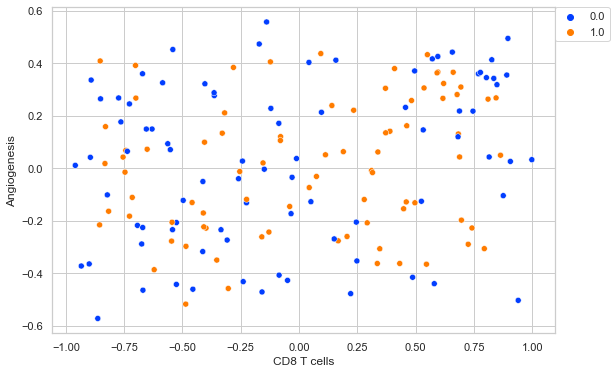

In [82]:
#Clean Cut plot

sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.5)
sns.scatterplot(y = 'HALLMARK_ANGIOGENESIS', x = 'HALLMARK_HYPOXIA', data = df_cleanCut, hue='score', 
                palette='bright')       #"icefire")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Angiogenesis')

plt.savefig('TCGA_cut_on_median.pdf')
    
plt.show()

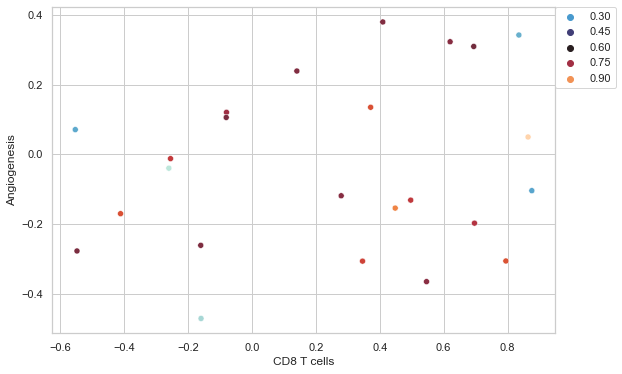

In [81]:
#Cut out middle

sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.5)
sns.scatterplot(y = 'HALLMARK_ANGIOGENESIS', x = 'CD8 T cells', data = df_drop_mid, hue='score', 
                palette='icefire')       #"icefire")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Angiogenesis')

#if fn != False:
#    plt.savefig('alpha_diversity/' + str(fn) + '_observed.png')

plt.savefig('TCGA_cut_out_mid.pdf')
    
plt.show()

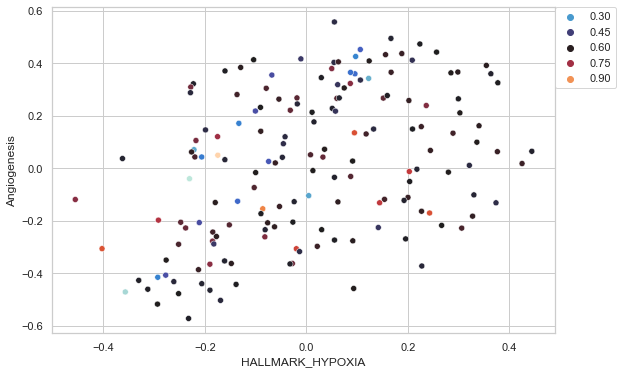

In [87]:
#Observed features plotting

sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.5)
sns.scatterplot(y = 'HALLMARK_ANGIOGENESIS', x = 'HALLMARK_HYPOXIA', data = df, hue='score', 
                palette='icefire')       #"icefire")

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.ylabel('Angiogenesis')


plt.savefig('TCGA_all.pdf')
    
plt.show()

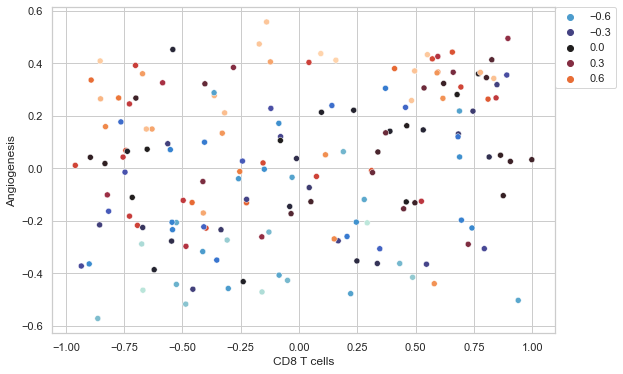

In [94]:

sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.5)
sns.scatterplot(y = 'HALLMARK_ANGIOGENESIS', x = 'CD8 T cells', data = df, hue='col_remodelling', 
                palette='icefire')       #"icefire")

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.ylabel('Angiogenesis')


plt.savefig('TCGA_ang_Tcells_collOverlay.png')
    
plt.show()

In [117]:
hallLow_cd8High = []
hallLow_cd8Low = []
hallHigh_cd8High = []
hallHigh_cd8Low = []

for index, row in df.iterrows():
    hall = row['HALLMARK_ANGIOGENESIS']
    cd8 = row['CD8 T cells']
    col = row['col_remodelling']
    
    if hall < 0:
        if cd8 < 0:
            hallLow_cd8Low.append(col)
        else:
            hallLow_cd8High.append(col)
    else:
        if cd8 < 0:
            hallHigh_cd8Low.append(col)
        else:
            hallHigh_cd8High.append(col)

'''
print('Ang Low, Cd8 High ', statistics.median(hallLow_cd8High))
print('Ang Low, Cd8 Low ', statistics.median(hallLow_cd8Low))
print('Ang High, Cd8 High ', statistics.median(hallHigh_cd8High))
print('Ang High, Cd8 Low ', statistics.median(hallHigh_cd8Low))
'''

print('Ang Low, Cd8 High ', statistics.mean(hallLow_cd8High))
print('Ang Low, Cd8 Low ', statistics.mean(hallLow_cd8Low))
print('Ang High, Cd8 High ', statistics.mean(hallHigh_cd8High))
print('Ang High, Cd8 Low ', statistics.mean(hallHigh_cd8Low))


Ang Low, Cd8 High  -0.15476477958754267
Ang Low, Cd8 Low  -0.22430422941815037
Ang High, Cd8 High  0.18578432198064887
Ang High, Cd8 Low  0.2514197392834545


In [133]:
hallLow_cd8High = []
hallLow_cd8Low = []
hallHigh_cd8High = []
hallHigh_cd8Low = []

for index, row in df.iterrows():
    hall = row['HALLMARK_ANGIOGENESIS']
    cd8 = row['CD8 T cells']
    col = row['id'][0]
    col = col.replace('.01A','')
    
    #print(row)
    #print(row['id'][0])
    #print(col)
    #print()
    #print()
    
    if hall < 0:
        if cd8 < 0:
            hallLow_cd8Low.append(col)
        else:
            hallLow_cd8High.append(col)
    else:
        if cd8 < 0:
            hallHigh_cd8Low.append(col)
        else:
            hallHigh_cd8High.append(col)


print('Ang Low, Cd8 High ', len(hallLow_cd8High))
print('Ang Low, Cd8 Low ', len(hallLow_cd8Low))
print('Ang High, Cd8 High ', len(hallHigh_cd8High))
print('Ang High, Cd8 Low ', len(hallHigh_cd8Low))

Ang Low, Cd8 High  29
Ang Low, Cd8 Low  47
Ang High, Cd8 High  49
Ang High, Cd8 Low  40


No handles with labels found to put in legend.


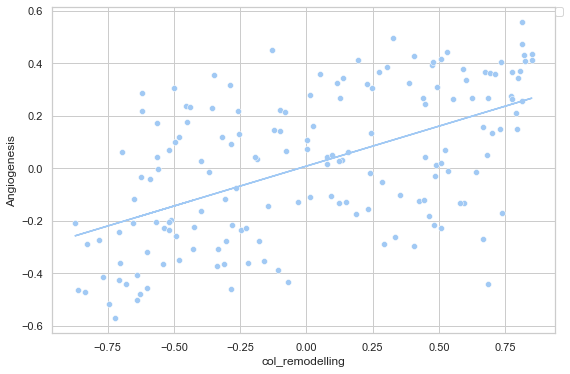

In [99]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.5)
sns.scatterplot(y = 'HALLMARK_ANGIOGENESIS', x = 'col_remodelling', data = df)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.ylabel('Angiogenesis')


#calculate equation for trendline
z = np.polyfit(df['col_remodelling'], df['HALLMARK_ANGIOGENESIS'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(df['col_remodelling'], p(df['col_remodelling']))

plt.savefig('TCGA_ang_col.png')
    
plt.show()